# 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
import inflection
import math
import datetime
from IPython.core.display import HTML
from IPython.display import Image

## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
# EXPLANATION - Loading Data
'''
Primeiro lemos os arquivos e usamos e passamos o parâmetro low_memory false para ele entender que pode ler tudo de uma vez, se colocar 
true ele carregará os dados por chunckys, isso é pra pc fraco);

Em seguida fazemos o merge dos csv lidos;

E o .sample é pra ver se funcionou, pega uma linha aleatória do df.

'''

df_sales_raw = pd.read_csv('data/train.csv', low_memory = False)
df_store_raw = pd.read_csv('data/store.csv', low_memory = False)

# Merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store')

df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
426381,122,6,2014-06-14,7080,920,1,0,0,0,a,c,58260.0,4.0,2013.0,0,NaN,NaN,NaN


# 1.0 Descrição dos Dados  - (Passo 1)

In [3]:
df1 = df_raw.copy()

In [4]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 1.1 Rename Columns

In [5]:
# EXPLANATION - Rename Columns
'''
É necessário renomear as colunas que vem dos bancos de dados (sql) para facilitar nossa visualização. Dessa forma, 
1- Pegamos os nomes das colunas usando o .columns no df, copiamos e jogamos na cols_old.
2- Criamos a função snakecase para remover o camelcase
3- Criamos uma lista com o nome das colunas
4- atribuímos ao df.

'''

cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

df1.columns = cols_new

df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimension

In [6]:
# EXPLANATION - Data Dimension
'''
Qual o tamanho de linhas e colunas desse dataset?

Esse tanto de linhas o computador consegue rodar, se não, pode tentar no colabs ou em alguma cloud.
'''

print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Date Types

In [7]:
# EXPLANATION - Date Types
'''
Lembrar mudar a coluna date para data msm.
'''
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [8]:
# EXPLANATION - Data Dimension
'''
Existem 3 maneiras de tratar as NAs
1- Descatar as linhas com pelo menos um NA.
    Vantagem: rápido e fácil.
    Desvantagem (grande): está jogando dado fora - e se vc não tiver muitas linhas vc prejudica até a performance do seu modelo de ml

2- Usar algoritmos de ML - existem métodos que usa o próprio comportamento das colunas pra preencher aquele NA, exemplo, pode calcular a média ou mediana,
tem algoritmos que prevem que número seria ali se não fosse NA. Quando não se tem informação de negócio esse é uma caminho a se seguir (usando técnica para
recuperar dados faltantes).

3- É realmente entendendo o negócio vc descobre pq esse NA está aqui, pq é uma lógica de negócio que definiram no começo e se souber essa regra vc consegue
colocar valor nos NAs e recuperar os dados. 
'''

df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [9]:
# Data fields
# Most of the fields are self-explanatory. The following are descriptions for those that aren't.

# Id - an Id that represents a (Store, Date) duple within the test set
# Store - a unique Id for each store
# Sales - the turnover for any given day (this is what you are predicting)
# Customers - the number of customers on a given day
# Open - an indicator for whether the store was open: 0 = closed, 1 = open
# StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
# StoreType - differentiates between 4 different store models: a, b, c, d
# Assortment - describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance - distance in meters to the nearest competitor store
# CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
# Promo - indicates whether a store is running a promo on that day
# Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
# Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
# PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [10]:
df1['competition_distance'].max()

75860.0

In [11]:
#Resolvendo NA com lógica de negócio

# competition_distance ---------------------------------------------------------------------------------------------------------------------------
'''
No caso da desta coluna que se refere a: "distance in meters to the nearest competitor store", no caso desses NAs pode ser
que se refira a lojas muito distantes, sem concorrência no entorno.

O math.isnan dirá nessa linha nessa coluna se ela é NA
'''
# lambda x: 200000.0 if math.isnan(x['competition_distance']) else x['competition_distance'])
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)



# competition_open_since_month --------------------------------------------------------------------------------------------------------------------
'''
No caso da desta coluna que se refere a: "gives the approximate year and month of the time the nearest competitor was opened", no caso desses NAs 
pode ser que se refira a lojas que não existem por perto também e pode ser uma loja muito antiga ou esqueceram de preencher msm.

Inicialmente no primeiro ciclo do CRISP, atribuiremos os a data na data de abertura do competidor, isso se tiver valor
na coluna de distancia do competidor, pois indica que existe realmente uma loja ali.
Tentaremos isso pois ele está pensando lá na frente na etapa de feature engineering, pois tem algumas var que derivam do tempo que sao
muito importantes para representar o comportamento, ex: quanto tempo faz desde que um evento aconteceu?

Quando tem mais de uma coluna (date e competition_open_since_month) tem que passar o axis=1 para dizer que é ao longo das colunas.
'''

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# competition_open_since_year --------------------------------------------------------------------------------------------------------------------
'''
Mesma lógica do de cima
'''
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)


# promo2_since_week ------------------------------------------------------------------------------------------------------------------------------
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)


# promo2_since_year ------------------------------------------------------------------------------------------------------------------------------
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)


# promo_interval ---------------------------------------------------------------------------------------------------------------------------------
# inplace igual a true para nao retornar nenhum valor e sim para fazer modificar direto na coluna
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dez'}

df1['promo_interval'].fillna(0, inplace=True)

# extraindo o mês da data e aplicando esse dicionário para fazer a tradução
df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [12]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types

In [13]:
'''Sempre que fizer uma operação em cima das colunas igual ao tópico 1.5, é importante checar de novo para ver como estão os tipos de cada uma 
das colunas porque pode ser que o resultado daquela operação tenha mudado o tipo original.
'''

df1.dtypes

#Convertido de float para int.

df1['competition_open_since_month'] = np.int64(df1['competition_open_since_month'])
df1['competition_open_since_year'] = np.int64(df1['competition_open_since_year'])

df1['promo2_since_week'] = np.int64(df1['promo2_since_week'])
df1['promo2_since_year'] = np.int64(df1['promo2_since_year'])

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical 

In [14]:
'''A descrição estatística serve para duas coisas:

1- Ganhar conhecimento de negócio.
    Duas grande métricas de estatística: Dispersão e tendência central - são métricas de estatística de 1° ordem
       
        *Tendência Central: resume os dados em um único número. Ex: média e mediana.
        E depois para complementar essa informação, pois apenas com a tendência central não diz o quão esparso estão os dados da minha média.

        *Dispersão: diz se está muito concentrado perto da média(por exemplo) ou muito disperso em relação a ela.
        Nos permite detectar a dispersão dos dados:
            
            Variância:
            -------------------------------------------------------------------------------------------------------------------------------------
            Desvio Padrão: distância dos pontos em relação a média.
            -------------------------------------------------------------------------------------------------------------------------------------
            Min e Max;
            -------------------------------------------------------------------------------------------------------------------------------------
            Range: valore entre mínimo e máximo.
            -------------------------------------------------------------------------------------------------------------------------------------
            Skew: Como é a deformação da minha distribuição em relação a normal(sino - var mais pra esquerda skew +, mais pra direita skew-).
            -------------------------------------------------------------------------------------------------------------------------------------
            Kurtosis: Diz sobre concentração dos dados, quanto maior a Kurtosis positiva, significa mais dados concentrados e um pico muito alto,
                agora, dados com um pico menor, mais dispersos, kurtosis que tende para valores negativos.
            -------------------------------------------------------------------------------------------------------------------------------------

2- Conseguir detectar alguns erros.
    Exemplo uma soma de vendas com valor negativo, não faz sentido venda negativa. Tentar entender o pq disso, pode ser erro de sistema etc.

Separar var numerica de categorica, da pra fazer pras duas mas a forma como faz pra cad é diferente

'''

#Separar var numerica de categorica

num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

# num_attributes e cat_attributes são dataframes.

### 1.7.1 Numerical Attributes

In [15]:
#Central Tendency (ct) - mean, median

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T
d2 = pd.DataFrame(num_attributes.apply(min) ).T
d3 = pd.DataFrame(num_attributes.apply(max) ).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min()) ).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew()) ).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis()) ).T

#Concatenate - save in "m" metrics

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

#Média e mediana parecidas quer dizer que não há um deslocamento da normal muito grande, que é representando pela skew (próxima de 0, prox de normal).
# E kurtosis próximo de 1, não tem pico muito grande.

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [16]:
#Em competition_distance: a skew está em 10, muito alta, super deslocado para a esquerda;
#E uma kurtosis gigantesca de 147
#Então sem olhar da pra distribuição, da pra ver que parece que essa distribuição parece uma tipo poisson, pico alto no começo dps ela vai caindo.
#Isso significa que tem uma concentração muito alta no começo
#Muita concentração, kurtosis alta

# Em customers ele olhou a mediana (609) e o desvio padrão std (464), e comentou que, arredondano, aproximadamente tem dia que teve 200 ou tem dia
#que teve 1000

C:\Users\andre\AppData\Local\Temp\ipykernel_2096\710812770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['sales'])


<AxesSubplot: xlabel='sales', ylabel='Density'>

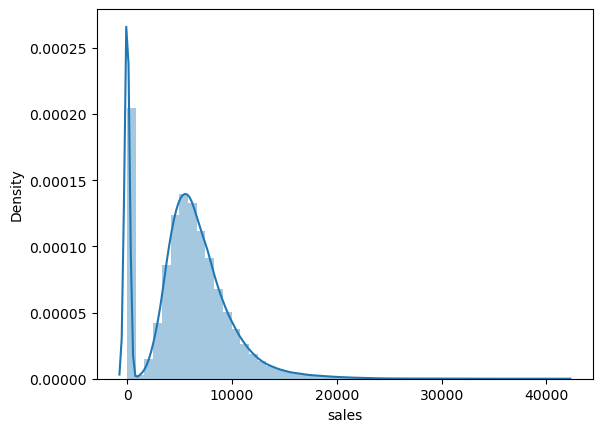

In [17]:
sns.distplot(df1['sales'])

### 1.7.2 Categorical Attributes

In [18]:
# Boxplot tem dispersão e tendencia central em um lugar só

# Quantos níveis cada var catergorica tem? código abaixo
# Shape[0] para ver todos os valores unicos de cada categoria

cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot: xlabel='state_holiday', ylabel='sales'>

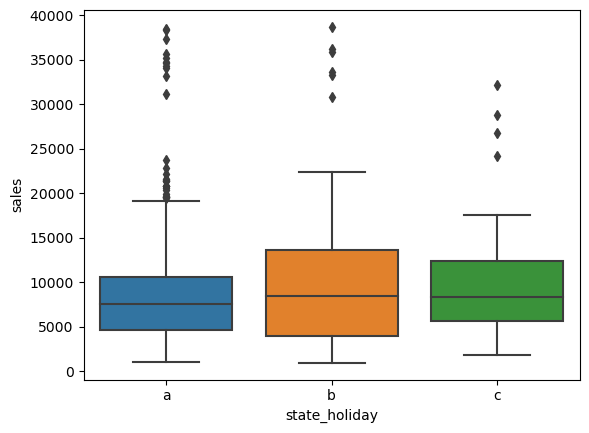

In [19]:
#x referencia -nome categoria, yo que quero medir -vendas - como estão a dispersão das vendas em cada um dos níves da minha var categorica
# sns.boxplot(x='state_holiday' ,y='sales', data=df1)

#No gráfico não da pra ver nada praticamente, pq os nossos ranges, a dimensão das variáveis está muito diferente 
#Isso é provável pq temos os dias que as lojas estão fechadas e dias que as vendas são 0 pq as lojas estão fechadas

# filtrando

aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

sns.boxplot(x='state_holiday', y='sales', data=aux1)

<AxesSubplot: xlabel='assortment', ylabel='sales'>

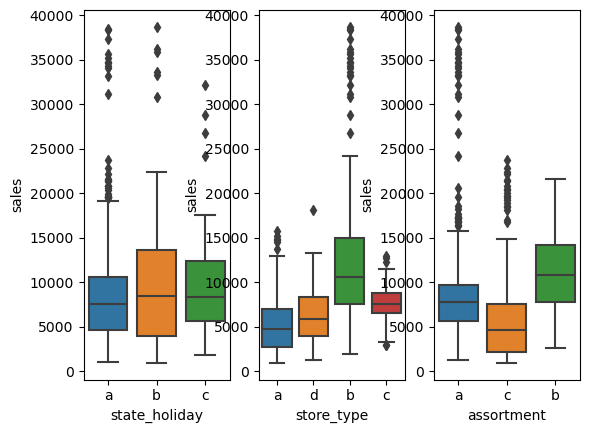

In [20]:

aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]
plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux )
plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux )
plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux )



In [21]:
'''
Como o Boxplot funciona?

Linha do meio da caixa: é o quiquagésimo quartio, que é a mediana, é o quartil 50 (metade)
Se pegar todos os dados da coluna e ordenar de forma crescente e contar as posiçoes, quando chegar na posiçao 50(na metade), este valor será sua
mediana, que é aquela linha dentro da caixa

linha de baixo da caixa: vigésimo quinto quartil (qaurtil 25)

linha de cima da caixa: quartil 75

NO gráfico entre o quártil 25 e 50 é o volume dos numeros entre esses quartis 

A linha de cima lá o 'T' é o 100 (valor max) e o la debaixo o valor mínimo


Acima do tracinho T la em cima temos os outliers, que ele considera como 3x o desvio padrao(regra básica de definição do outlier)



dados pouco volumosos em torno da mediana, então quer dizer que tenho uma concentração maior em torno da mediana


noção de como as vendas estão distribuídas dentro de cada um dos níveis das var categoricas

Aula 7 final dela ele faz uma análise simples desses gráficos gerados 

VERIFICAR!!!!!!!!!!!
"min" nao è o valor mìnimo e sim = Q1-1.5* (Q3-Q1)
"max" nao è o valor màximo e sim = Q3+1.5 *(Q3-Q1)
'''

'\nComo o Boxplot funciona?\n\nLinha do meio da caixa: é o quiquagésimo quartio, que é a mediana, é o quartil 50 (metade)\nSe pegar todos os dados da coluna e ordenar de forma crescente e contar as posiçoes, quando chegar na posiçao 50(na metade), este valor será sua\nmediana, que é aquela linha dentro da caixa\n\nlinha de baixo da caixa: vigésimo quinto quartil (qaurtil 25)\n\nlinha de cima da caixa: quartil 75\n\nNO gráfico entre o quártil 25 e 50 é o volume dos numeros entre esses quartis \n\nA linha de cima lá o \'T\' é o 100 (valor max) e o la debaixo o valor mínimo\n\n\nAcima do tracinho T la em cima temos os outliers, que ele considera como 3x o desvio padrao(regra básica de definição do outlier)\n\n\n\ndados pouco volumosos em torno da mediana, então quer dizer que tenho uma concentração maior em torno da mediana\n\n\nnoção de como as vendas estão distribuídas dentro de cada um dos níveis das var categoricas\n\nAula 7 final dela ele faz uma análise simples desses gráficos gerad

# 2.0 Feature Engineering - (Passo 2)

## 2.1 MindMap Hypotheses

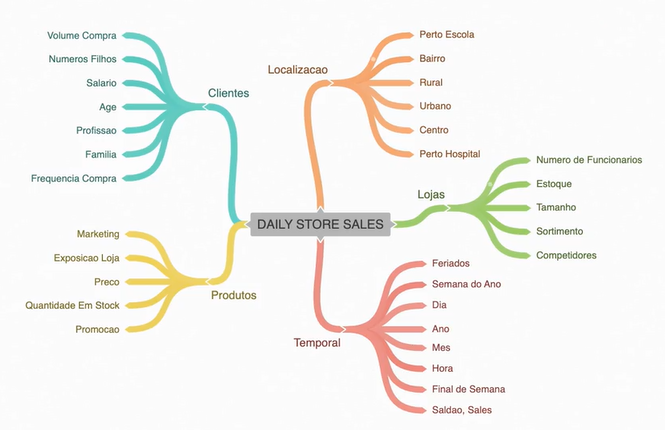

In [22]:
Image('images/MindMap1.PNG')

## 2.2 Hypotheses Creation

In [23]:
df2 = df1.copy()

In [24]:
# Começa com achismo mesmo eu acho isso: escrito abaixo

### 2.2.1 Hipótese Loja

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2 Hipótese Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**5.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais

### 2.2.3 Hipótese Tempo.

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Lista Final de Hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Feature Engineering

In [25]:
# Esssas sao as var que vamos derivar da var original date

#------------------------------------------------------------------------------------------------------------------------------------------------------
# Year 
df2['year'] = df2['date'].dt.year


#------------------------------------------------------------------------------------------------------------------------------------------------------
# Month
df2['month'] = df2['date'].dt.month


#------------------------------------------------------------------------------------------------------------------------------------------------------
# Day
df2['day'] = df2['date'].dt.day


#------------------------------------------------------------------------------------------------------------------------------------------------------
# Week of Year
df2['week_of_year'] = df2['date'].dt.weekofyear

# FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
#   df2['week_of_year'] = df2['date'].dt.weekofyear


#------------------------------------------------------------------------------------------------------------------------------------------------------
# Year Week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')


#------------------------------------------------------------------------------------------------------------------------------------------------------
# Competition Since - pegar a explicaçao do datetime datetime
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)
#precisa dividir por 30 para manter a granularidade mínima que é o mês, poderia ser semanas, semanas do ano, mas aqui queremos manter o mês como
#mínimo, pq na vdd estamos juntando o ano e o mês
# O .days extrai os dias desse datetime


#------------------------------------------------------------------------------------------------------------------------------------------------------
# Promo Since
#Preciso de duas datas para fazer a diferença entre elas, mas só tenho o ano e a semana do ano, aqui não temos o mês... então primeiramente
#faremos um join das duas coisas para ter uma única data.

df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
#para juntar as duas var precisam ser strings, depois voltaremos para data nas proximas linhas de código.

df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
#Aqui temos um truque convertemos a string para uma data, na strptime a '%Y-%W-%w' é o formato que ficará - W: semana do ano, 
# w: semana de domingo a domingo.
# depois subtraimos 7 dias usando a funçao timedelta.

df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)
#divide por 7 porque queremos em semanas e lá no lambda o .days extraia os dias desse resultado, dps converte em int.


#------------------------------------------------------------------------------------------------------------------------------------------------------
# Assortment
# Apenas colocando os nomes invés de deixar as letras como vieram no dataset original.

df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')


#------------------------------------------------------------------------------------------------------------------------------------------------------
# State Holiday
# Apenas colocando os nomes invés de deixar as letras como vieram no dataset original.

df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x =='c' else 'regular_day')

C:\Users\andre\AppData\Local\Temp\ipykernel_2096\2336888574.py:20: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [26]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 Filtragem de Variáveis - (Passo 3)

In [27]:
df3 = df2.copy()

In [28]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1 Filtragem das Linhas

In [29]:
# Primeiro filtra as linhas depois seleciona as colunas, isso para uma questão de performance, quando filtra as linhas diminui o volume do dataset
# e aí seleciona as colunas que quer trabalhar.

'''
Primeiro filtra as linhas depois seleciona as colunas, isso para uma questão de performance, quando filtra as linhas diminui o volume do dataset
e aí seleciona as colunas que quer trabalhar.

    No mundo real tem muita restrição de negócio porque cada time tem um processo, os dados tem um processo (tempo para estarem disponíveis).
    No mundo real é bem mais complicado essas etapas

    A restrição de negócio pode ser também, apenas um interesse em certo ponto do dataset, como por exemplo, apenas uma categoria de produto.
'''

df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

# Não queremos linhas da coluna open = 0, pois seriam lojas fechadas que não vendem, por isso o filtro é: df3['open'] != 0.
# Também não pegaremos sales menores que 0, por isso o filtro é: df3['sales'] > 0.

## 3.2 Seleção das Colunas

In [30]:
'''
Não utilizaremos a coluna customers, pois ela é uma restrição de negócio, não está disponível para nós no momento da predição, porque não sabemos 
quantos clientes teremos nas lojas daqui a 6 semanas, para isso, teriamos que fazer um projeto separado para fazer a previsão de quantos clientes
estariam em cada uma das lojas nas próximas 6 semanas, então pegariamos esse resultado e utilizariamos como input neste projeto.

Não utilizaremos a coluna open, pois após o filtro, todos os valores que sobraram são igual a 1, não terá variabilidade de nada aqui, nenhum tipo
de informação, por isso posso excluir essa coluna.

Removeremos a promo interval, que já derivamos a is promo; e a coluna month_map pois foi uma auxiliar

'''

cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis=1)
# Parâmetro axis=1 para remover as colunas e não as linhas.

In [31]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 Exploratory Data Analysis (Passo 4)

In [32]:
df4 = df3.copy()

## 4.1 Análise Univariada

### 4.1.1 Response Variable

C:\Users\andre\AppData\Local\Temp\ipykernel_2096\3848199619.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['sales']);
C:\Users\andre\AppData\Local\Temp\ipykernel_2096\3848199619.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df4['sales']));


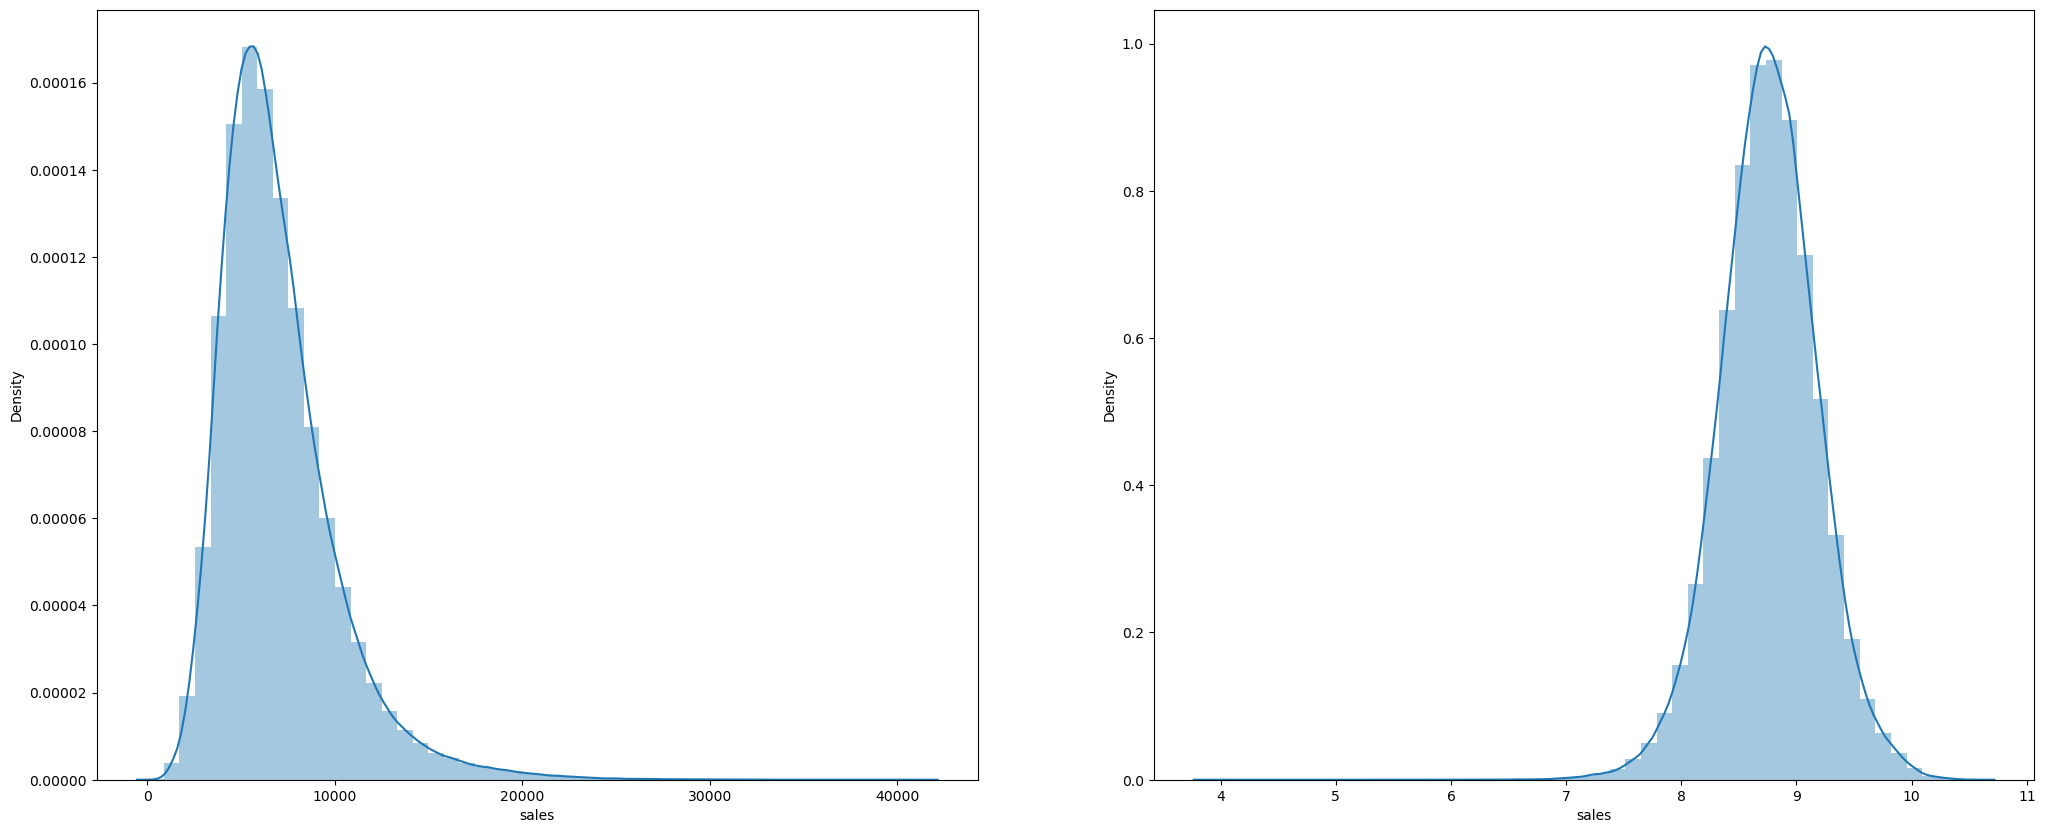

In [33]:
''' 
O gráfico abaixo está próxima de uma normal mas não é uma normal

Algoritmos de ml são criados com premissas (comportamentos do ambiente-espaço dos dados): dados indepentedes e normalmente distribuidos
então, quanto mais normal for sua var resposta melhor o algoritmo de ml vai performar, para isso e temos tecnias de transformar a distribuiçao
da var resposta mais proxima de uma var normal. Ex: np.log1pdf[''] , multiplica todos os valores de venda pelo log, modificando a var respota.
tem outra formas, exponencial, boxcos sei la, saber qual vai usar depende do meu conhecimento do negócio e ou do feeling na var resposta.
No segundo gráfico: mais próxima de uma normal

O eixo y no gráfico possui valores pequenos porque é um plot de uma densidade de distribuição, por isso tem essa linha, se quiser o 
histograma (sem a linha), só colocar o kde=False, aí mostra valores maiores. *** O que é isso exatamente ainda não sei.

'''
plt.rcParams['figure.figsize']=(25,10)

# Gráfico da esquerda: var resposta da análise univariada 
plt.subplot( 1, 2, 1);
sns.distplot(df4['sales']);


#Gráfico de exemplo para transformar mais próxima da normal para o algoritmo de ml, mas a var resposta é o gráfico da esquerda.
plt.subplot( 1, 2, 2);
sns.distplot(np.log1p(df4['sales']));

### 4.1.2 Numerical Variable

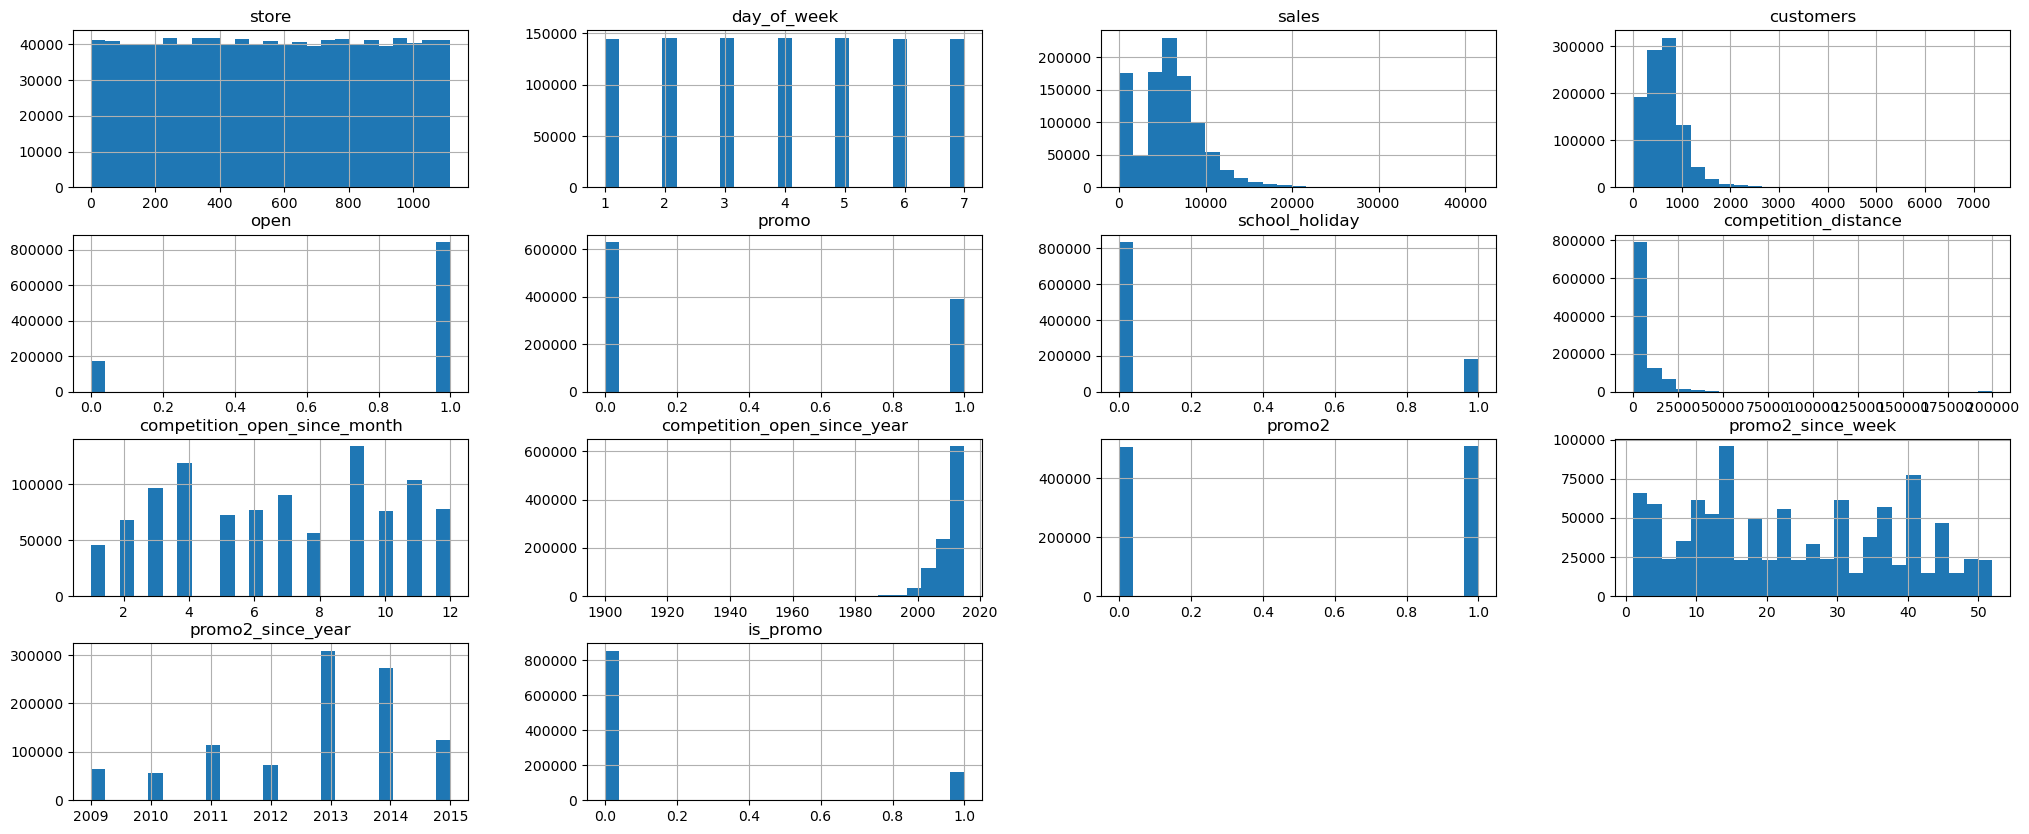

In [34]:
'''
Bins caixa onde coloca alguns dados

Falou isso na competiiton_open_since_month
Var com comportamento é importante porque quanto mais comportamento a var tem mais explicativa do fenômeno ela é, ela consegue explicar mais
o fenômeno

Falou isso na day of week - não importa dia da semana, vende basicamente igual, não tem aqui um comportamento
Provalvemente a var day of week, sozinha, se não for comparado com nada, quase não tem informação relevante pro aprendizado do modelo 

Exercício: tente explicar esses plots para alguém o que significa, não precisa pensar em estatística agora, apenas em causa e efeito, quanto
maior... quanto menor... etc
'''

num_attributes.hist(bins=25);


### 4.1.3 Categorical Variable

In [35]:
# Essa linha de código, ele usa só pra ver os itens que tem na coluna, isso não altera o dataframe.
# Por exemplo: Quais são os níveis da var categoria assortment?

df4['state_holiday'].drop_duplicates()
df4['store_type'].drop_duplicates()
df4['assortment'].drop_duplicates()


0         basic
3      extended
258       extra
Name: assortment, dtype: object

<AxesSubplot: xlabel='sales', ylabel='Density'>

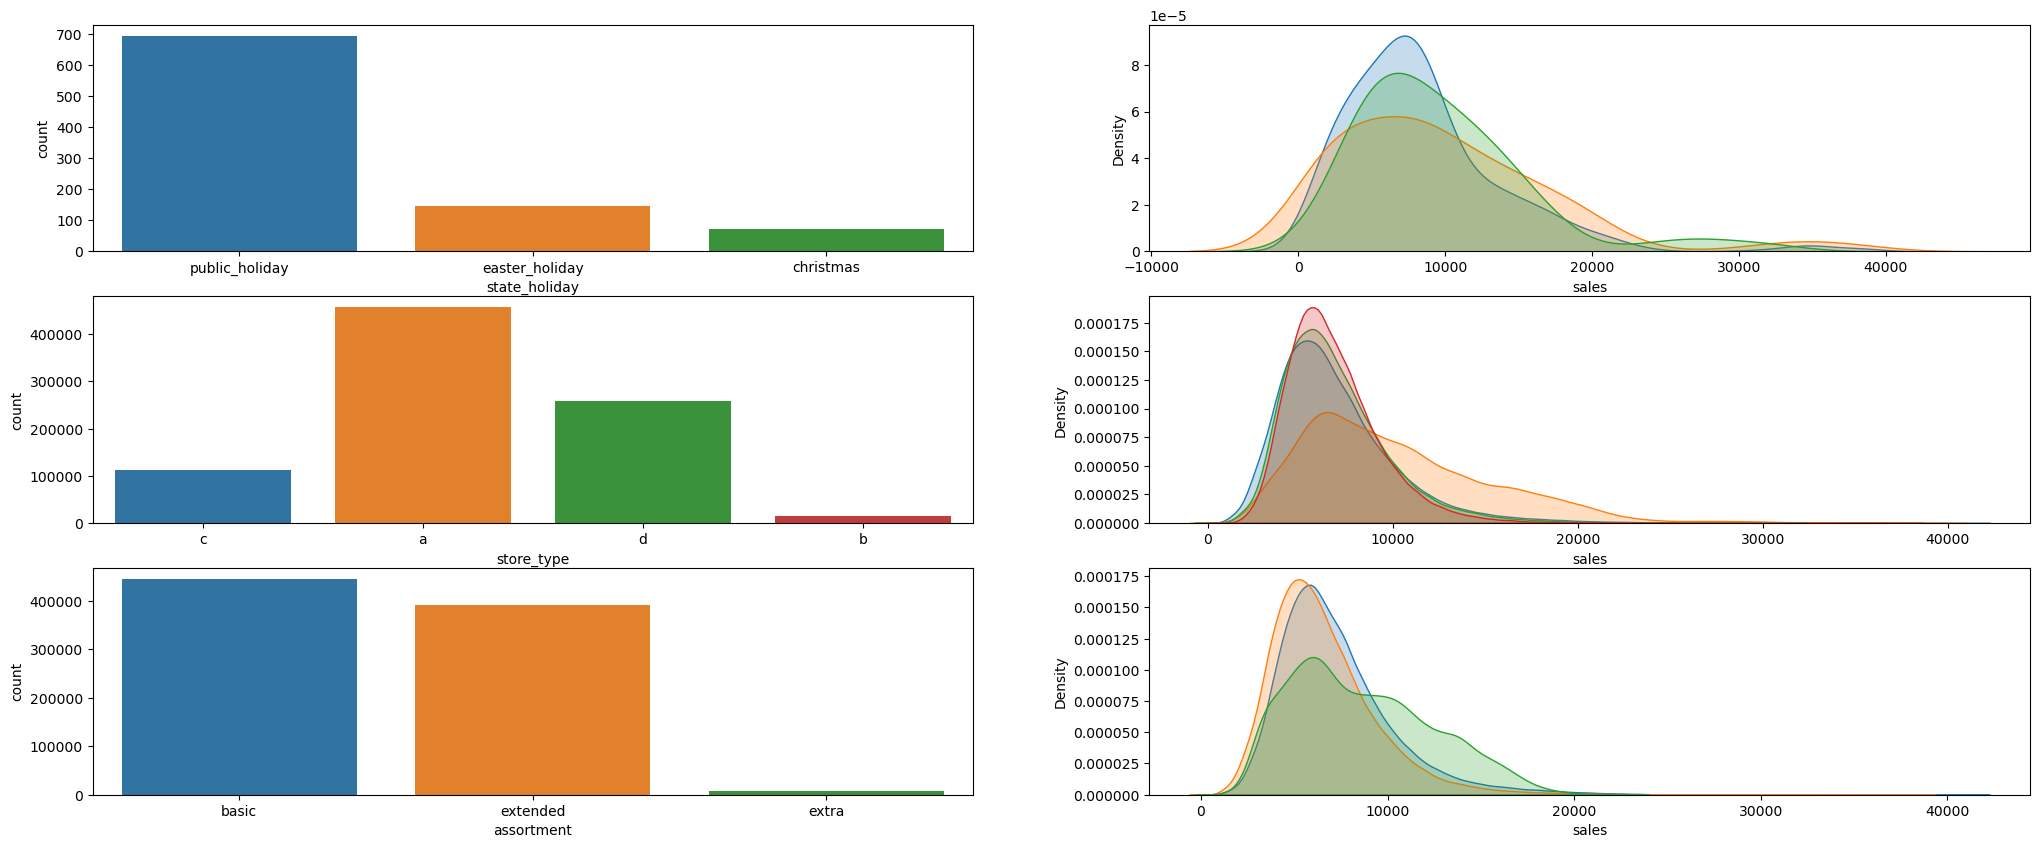

In [36]:
'''
Variavel categoria é "uma pedra no sapato" porque a academia msm em si não tem muita pesquisa sobre como lidar com isso, existem vários tipos de 
encouding (transformar var categoriaca numa numerica)

Dois plots para resumir a analise univarida de var categorica

basicamente ele disse que essa diferença é boa pro modelo entender

Nesses dois gráficos do state_holiday temos informação, quando passar pelo período de pascoa ou natal, o algoritmo de ml vai saber dimensiornar esse
volume, essa var state_holiday será importante pro aprendizado do modelo.

PELO O QUE ESTENDI AQUI, ACHO QUE NÃO É PRA TIRAR UMA CONCLUSÃO DIRETA E SIM VERIFICAR SE TEM ALTOS E BAIXOS, REAÇOES UM COM OUTRA, E SIM, É ALGO
QUE O ALGORITMO DE ML CONSEGUIRÁ APRENDER.

Na função kdeplot o parametro fill agora é fill - aviso do sns.

'''

# state_holiday

plt.subplot(3,2,1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(x = a['state_holiday'])

plt.subplot(3,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday', fill = True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday', fill = True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas', fill = True)

# Nesses dois gráficos do state_holiday temos informação, quando passar pelo período de pascoa ou natal, o algoritmo de ml vai saber dimensiornar esse
# volume, essa var state_holiday será importante pro aprendizado do modelo.



# store_type

plt.subplot(3,2,3)
sns.countplot(x = df4['store_type'])

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label = 'a', fill = True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label = 'b', fill = True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label = 'c', fill = True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label = 'd', fill = True)

# Tipos de loja que vendem pouco, outras médio, outras super alto... enquanto lojas do tipo b tem alta concentração, Essas indagações são uma prova
# de que essa var(store_type) tem informação, então é importante mante-la para o aprendizado do modelo.


# Assortment
plt.subplot(3,2,5)
sns.countplot(x = df4['assortment'])

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label = 'extended', fill = True)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label = 'basic', fill = True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label = 'extra', fill = True)

# Podemos ver que o tipo de assortment basic vende mais, depois o extended, mas extra vende muito pouco
# O extra tem um pico menor, mas uma distribuição maior. Então temos mais lojas com diferentes tipos de extra, temos lojas que vendem mais com o
# assortment extra e lojas que vendem menos com o assortment extra.




## 4.2 Análise Bivariada

### H1. Lojas com maior sortimentos deveriam vender mais.
**FALSA** - Lojas com maior sortimento VENDEM MENOS!

<AxesSubplot: xlabel='year_week'>

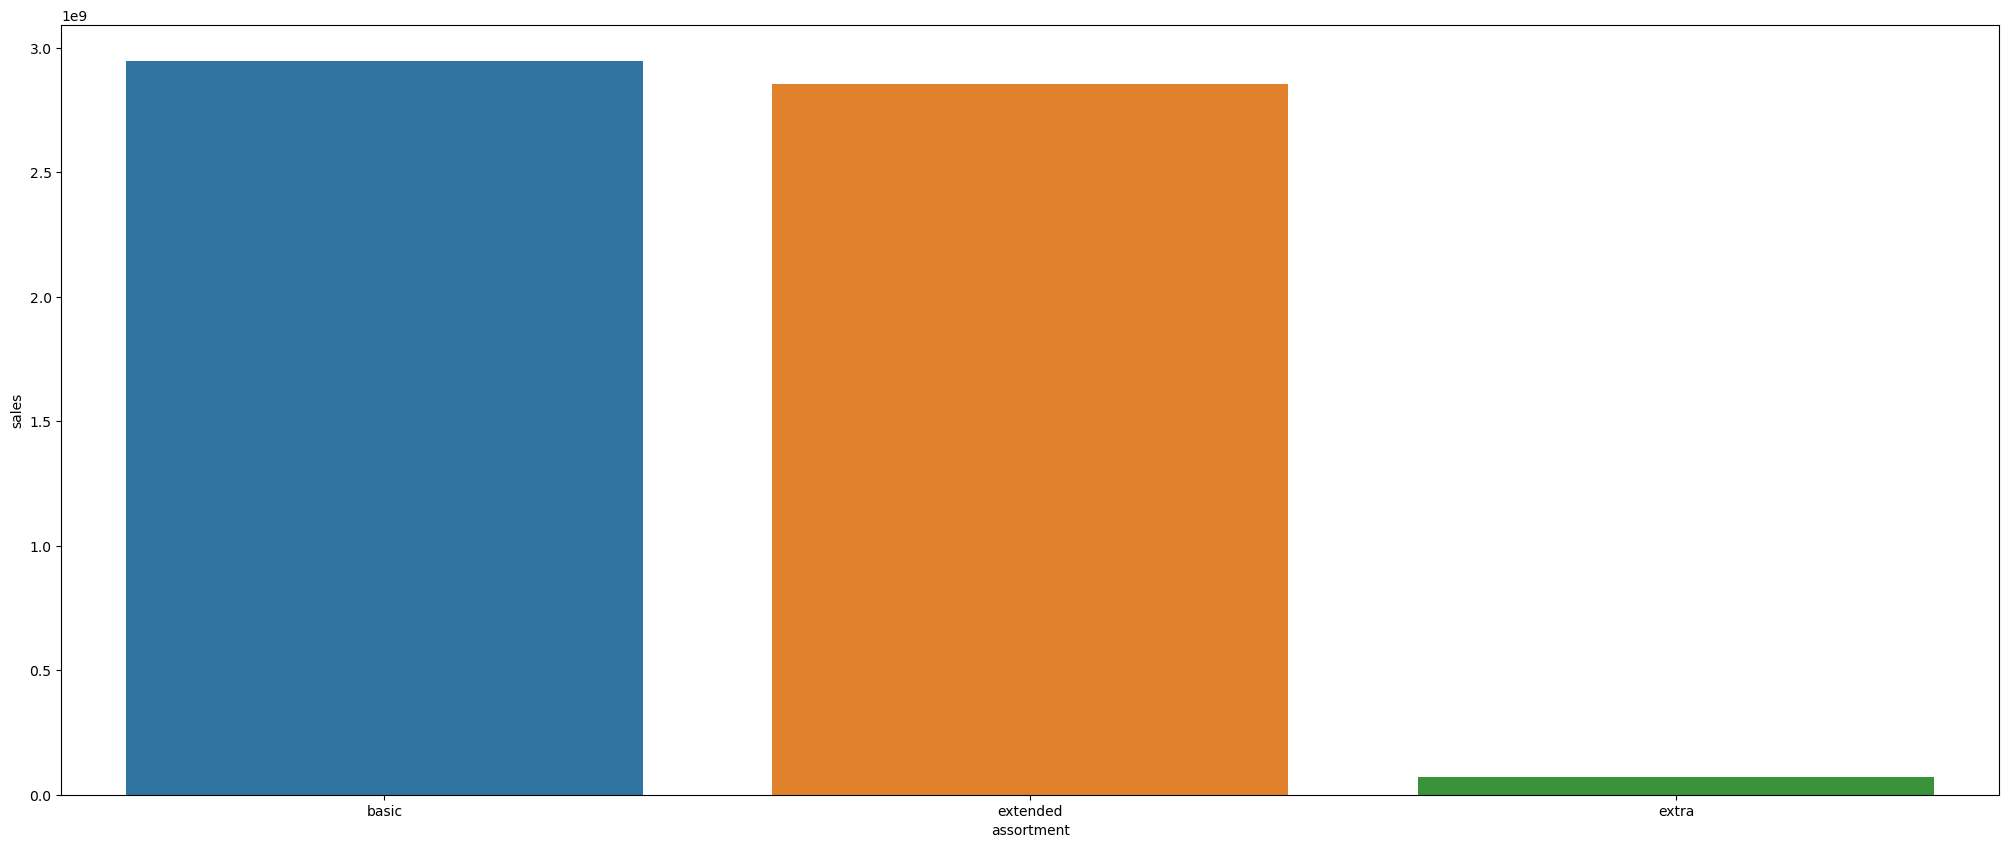

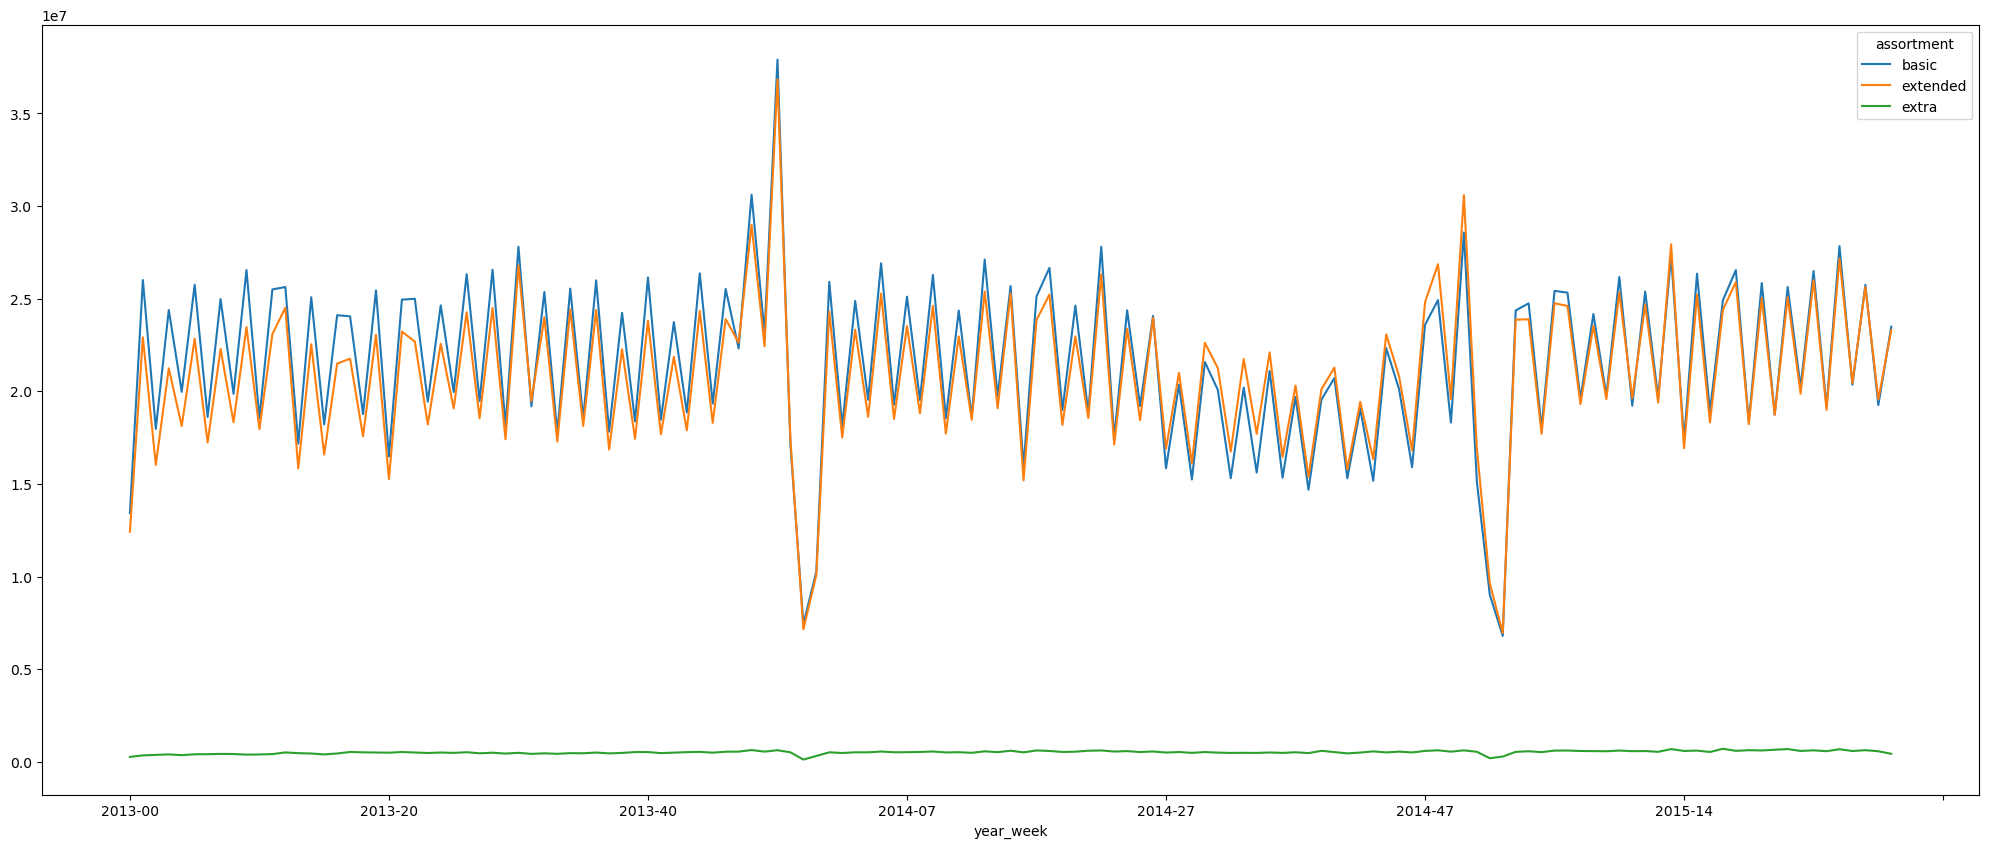

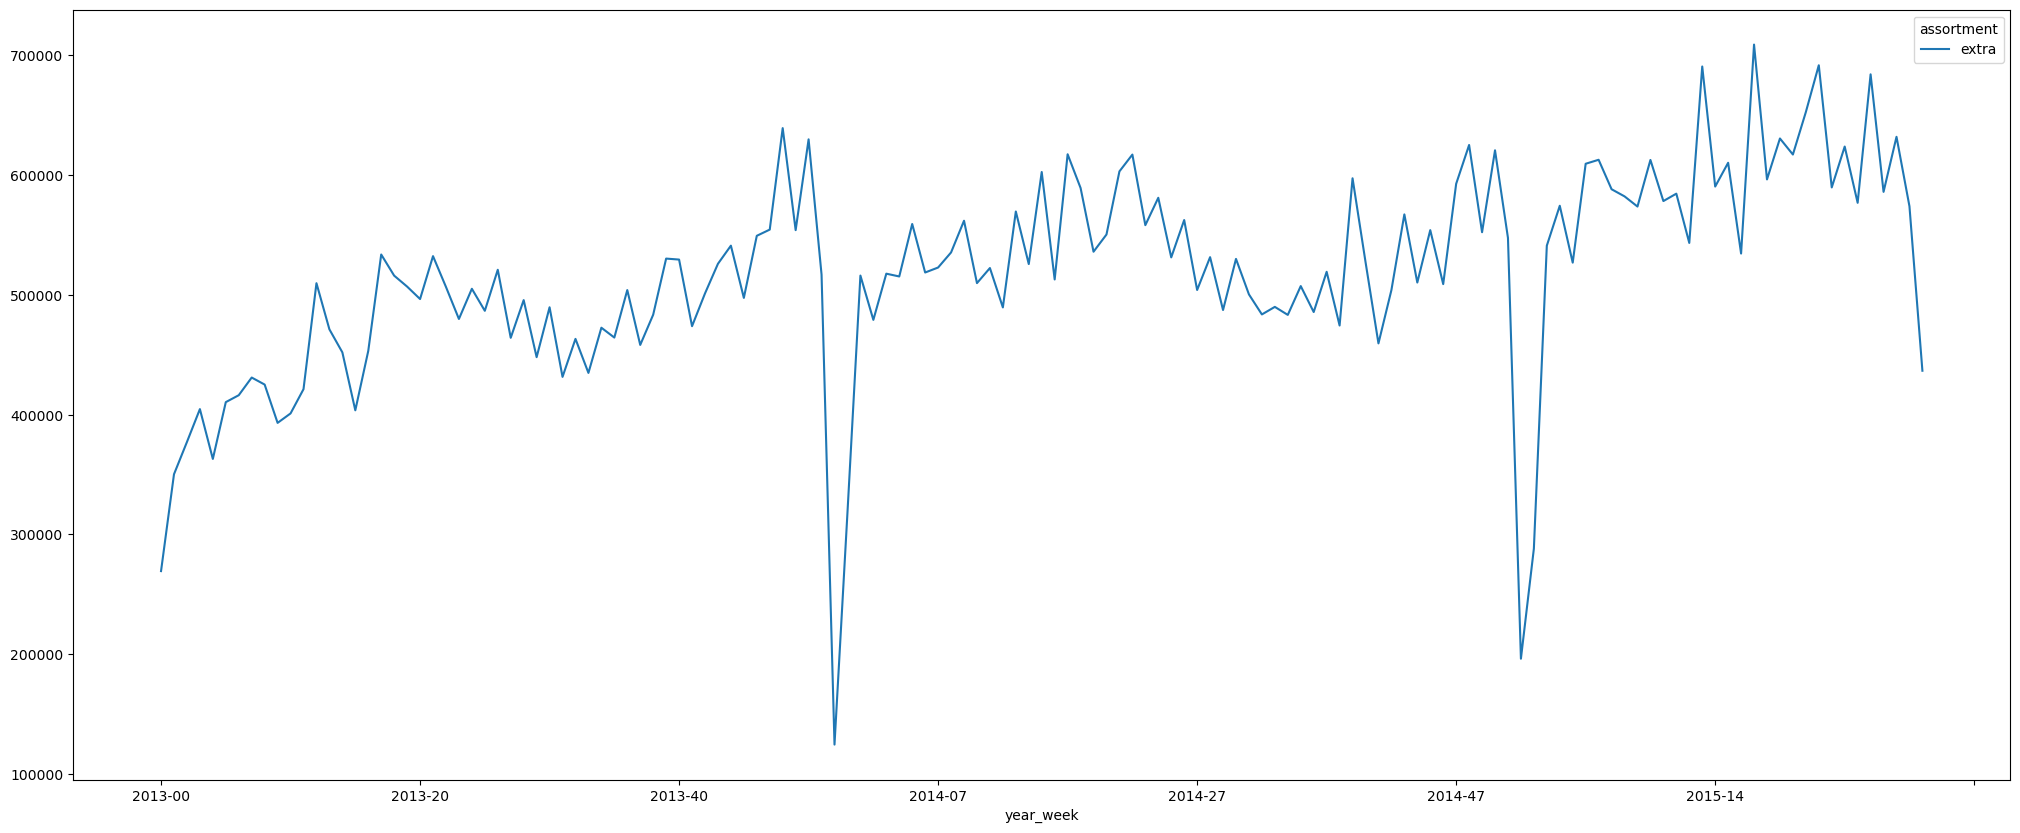

In [37]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1);

# Para ver se tem uma variação no tempo dos tipos de assortment, ele faz o seguinte código. Só que para ter uma linearidade, para criar o gráfico de
# linha, é necessário usar a função pivot, para manter de certa forma o groupby mas perdindo alinhar cada assortment (visualize para entender).

aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot()

#Podemos concluir desse gráfico de linhas ao longo do tempo que o assortment basic e extended são basicamente a mesma coisa - o basic é um pouco
#maior que o extended, mas eles são completamente iguais de comportamento.
#O extra está muito pequeno pq o volume de venda dos outros é tão grande que puxa a escala muito pra cima e aí a linha do extra fica pequena.
# Para verificarmos a linha do extra, pra er se é linear mesmo, segue o código

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index='year_week', columns='assortment', values='sales').plot()

# Sempre olhe o eixo y onde tem a magnitude dos valores, se alguns valores forem muito descrepantes de outros vale a pena plotar separado para
# poder enxergar algum comportamento.

# Dois pontos sobre nosssa H1, em termos de: validação de hipótese(1), relevância para o modelo(2):
#   1- Lojas com maior sortimento VENDEM MENOS! Posso afirmar, pois estou mostrando com os dados, não há prova refutável contra dados!
#   2- Sim é relevante para o modelo, pois quando ele enteder o comportamento do basic e do extended, entenderá como comportamento bem similar,
#   mas quando aparecer o extra, ele entederá que há um comportamento diferente - volume bem menor e uma sazonalidade bem diferente tmb.

### H2. Lojas com competidores mais próximos deveriam vender menos.
**FALSA** - Lojas com competidores mais próximos VENDEM MAIS!

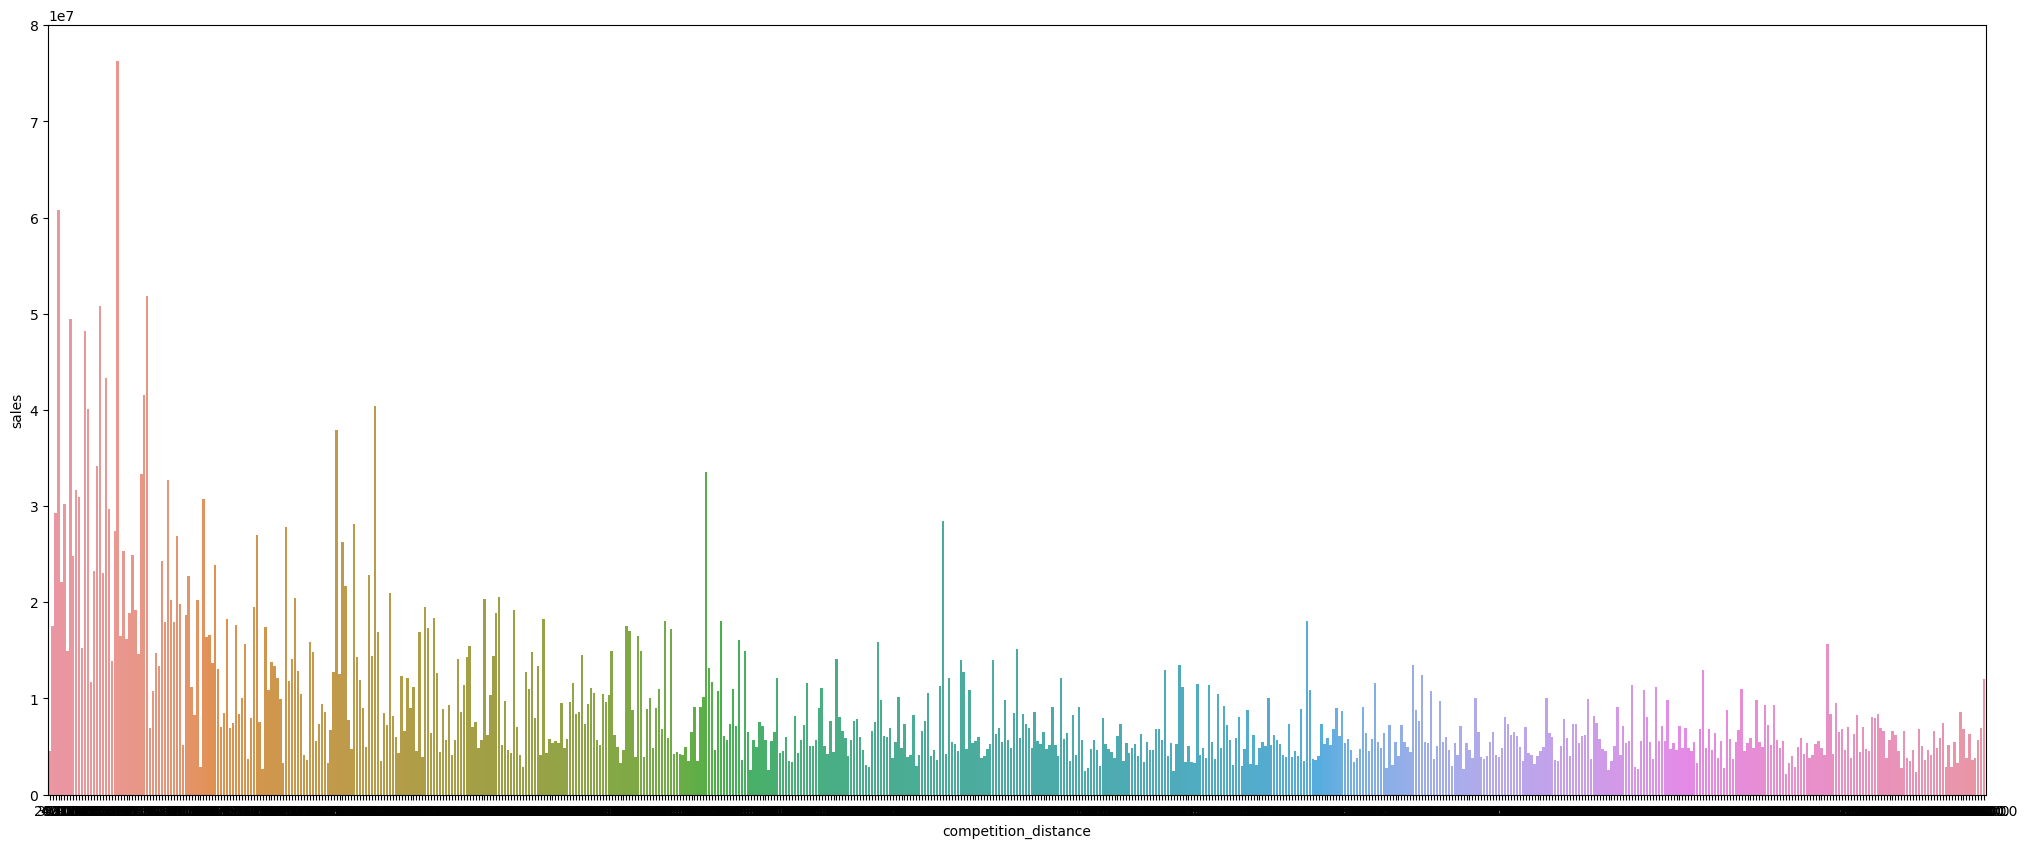

In [38]:
# Gráfico muito granular - difícil de enxergar alguma coisa
# Devemos criar agruparemos para facilitar a visualização
# Então usamos o bin que são grupos de valores, agrega valores numa barra facilitando olhar, para criar os histogramas. 

aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()
sns.barplot(x='competition_distance', y='sales', data=aux1);


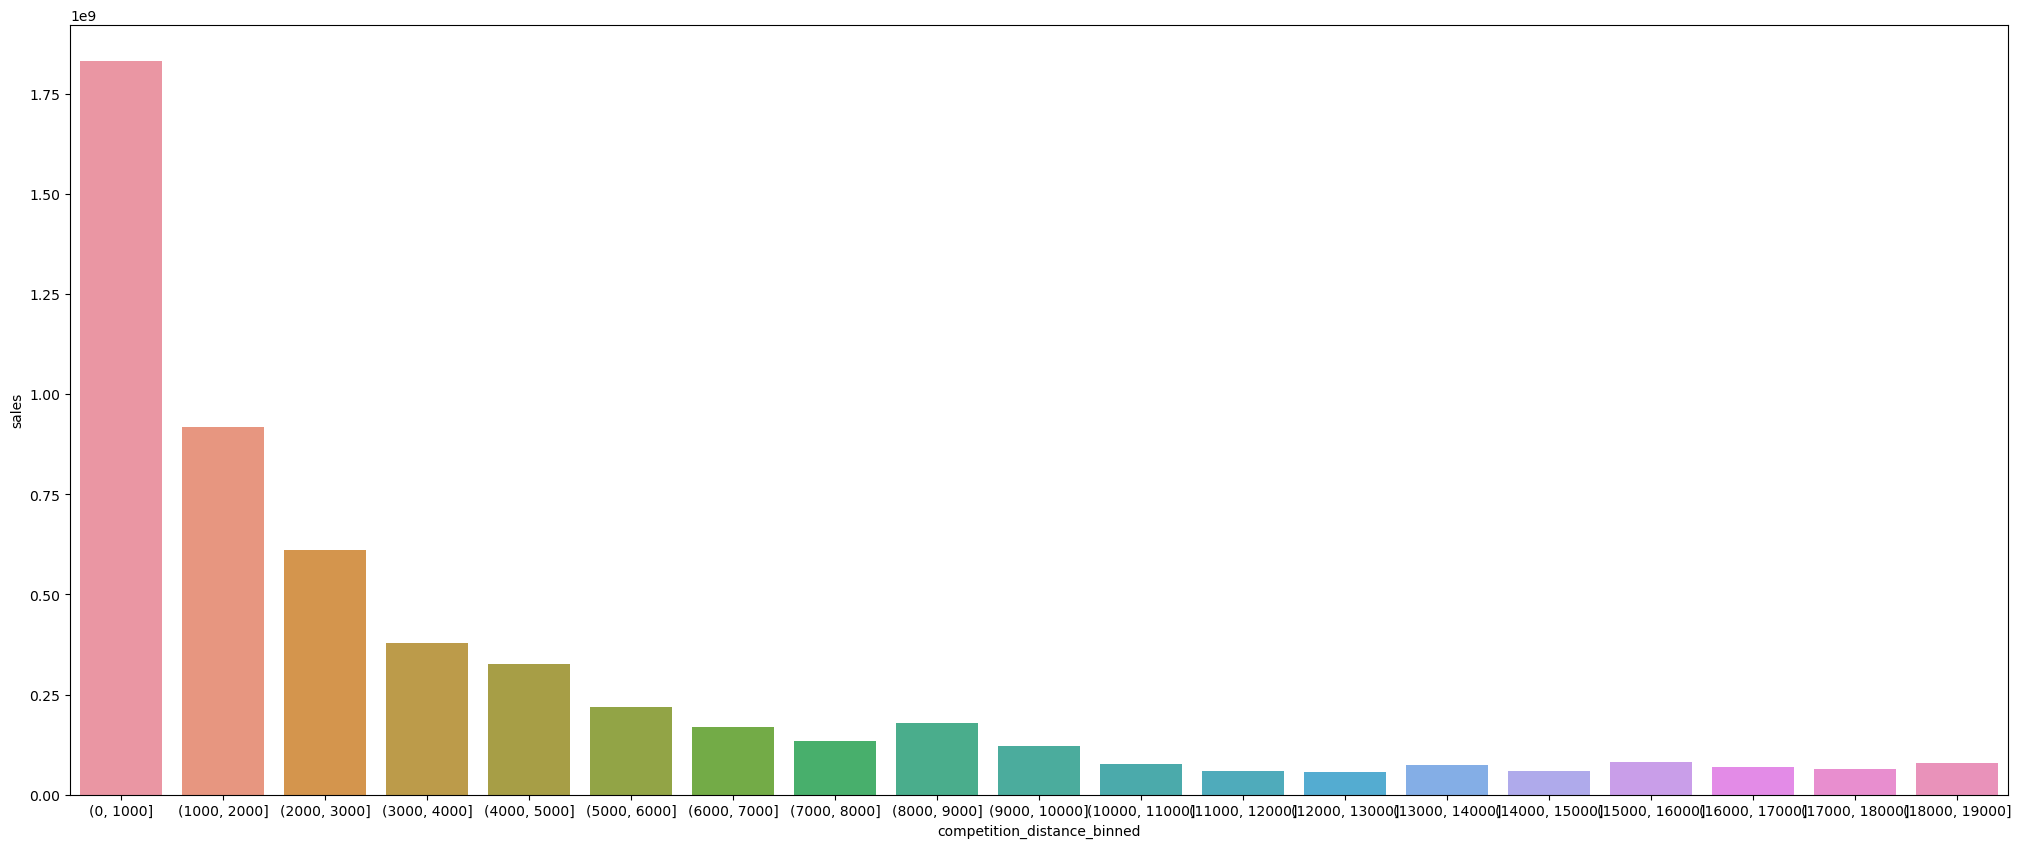

In [39]:

aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

#Esses número são totalmente arbitrários, pode ser 50k 100k e pode aumentar o tamanho do grupo de 1k pra 10k, 15k, 6k...
# O 20k é o tamanho max e o 1k é como será fracionado esses grupos, de mil em mil até 20k.
bins = list(np.arange(0, 20000, 1000))

# Para saber aonde que valor em que grupo ele encaixa - .cut # em qual bin e qual grupo, aquele valor original pertence (bins = bins)
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins = bins)

# aux1.sample(4) 
# grupo de 14k a 15k

# depois somar todas as vendas dentro dos grupos
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned', y='sales', data=aux2);

# Obs.: no gráfico, lembrar que quando tem parenteses não inclui (bolinha aberta) e colhcete inclui bolinha fechada 

# Competidores próximos, incentiva muito mais a competição das vendas, compartilhamento de venda maior entre os competidores. Então quanto mais
# próximo os competidores estão, maior é a concorrência... e teoricamente, menor as vendas, MAS os DADOS mostram que onde tem competidores próximos 
# as lojas vendem MAIS!
# Essa informação encontrada é um isight tipo 2, onde choca uma crença!



<AxesSubplot: xlabel='competition_distance', ylabel='sales'>

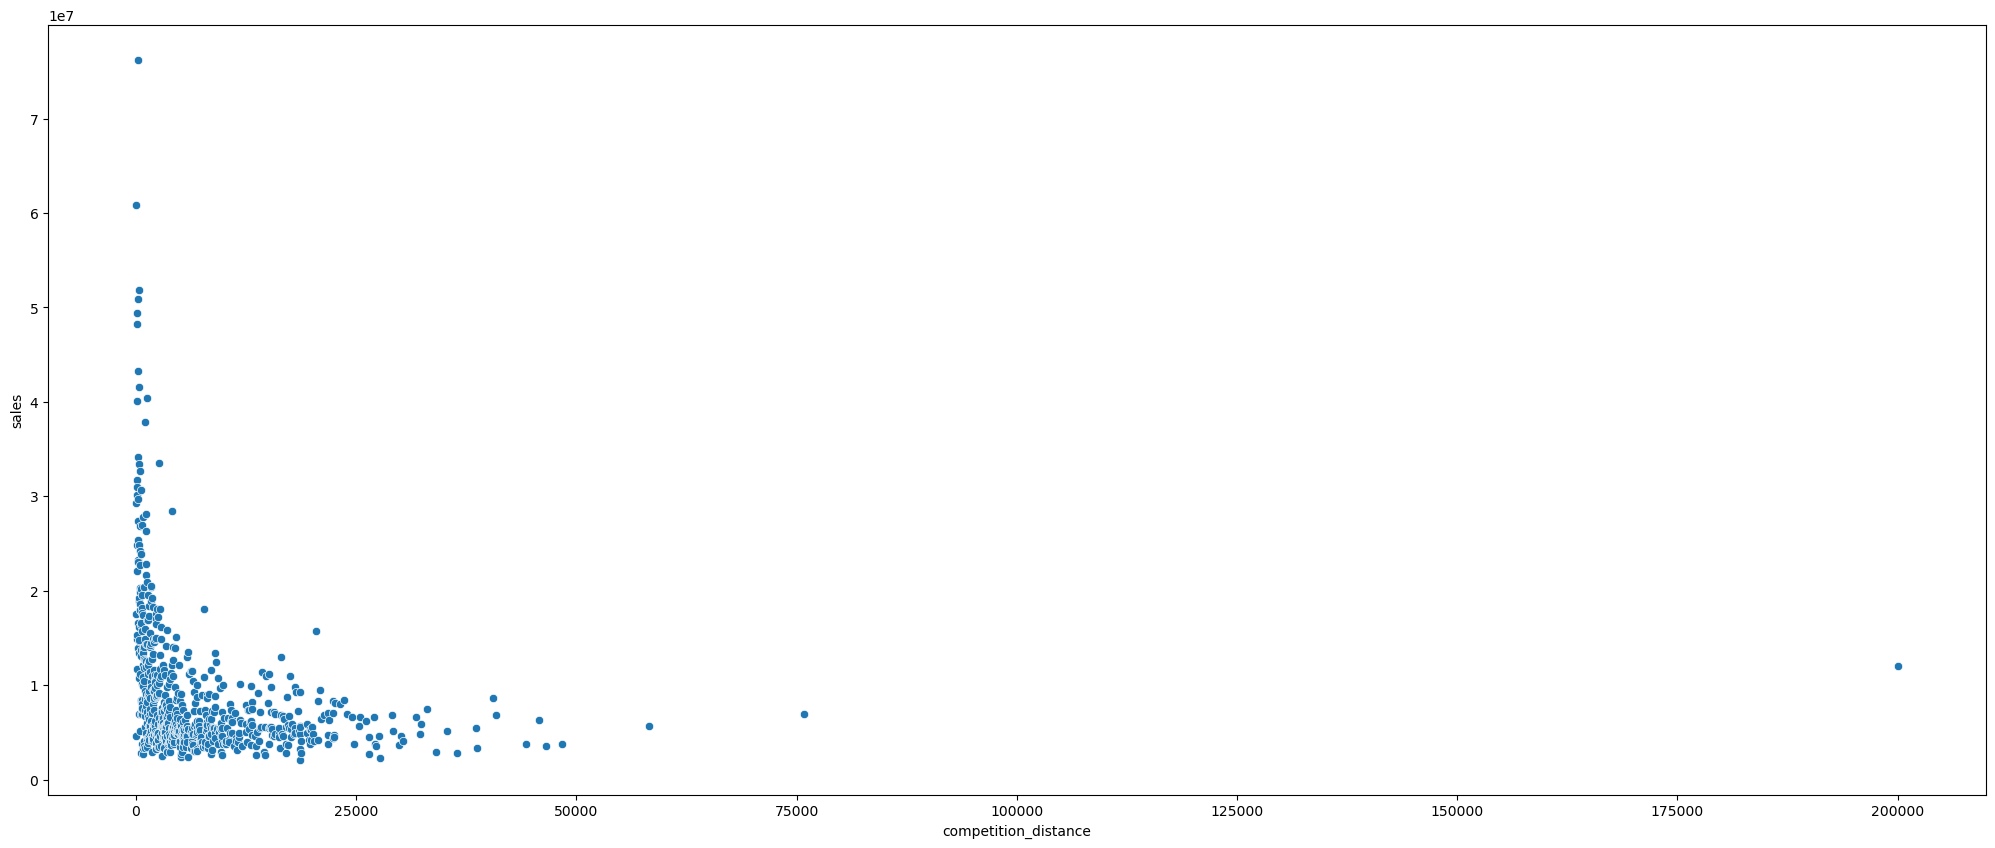

In [40]:
# Quando temos dados muitos granulares e fica muito dificl ver em barras ou em linhas, interessante usar scatterplot
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()
sns.scatterplot(x = 'competition_distance', y='sales', data=aux1)




<AxesSubplot: >

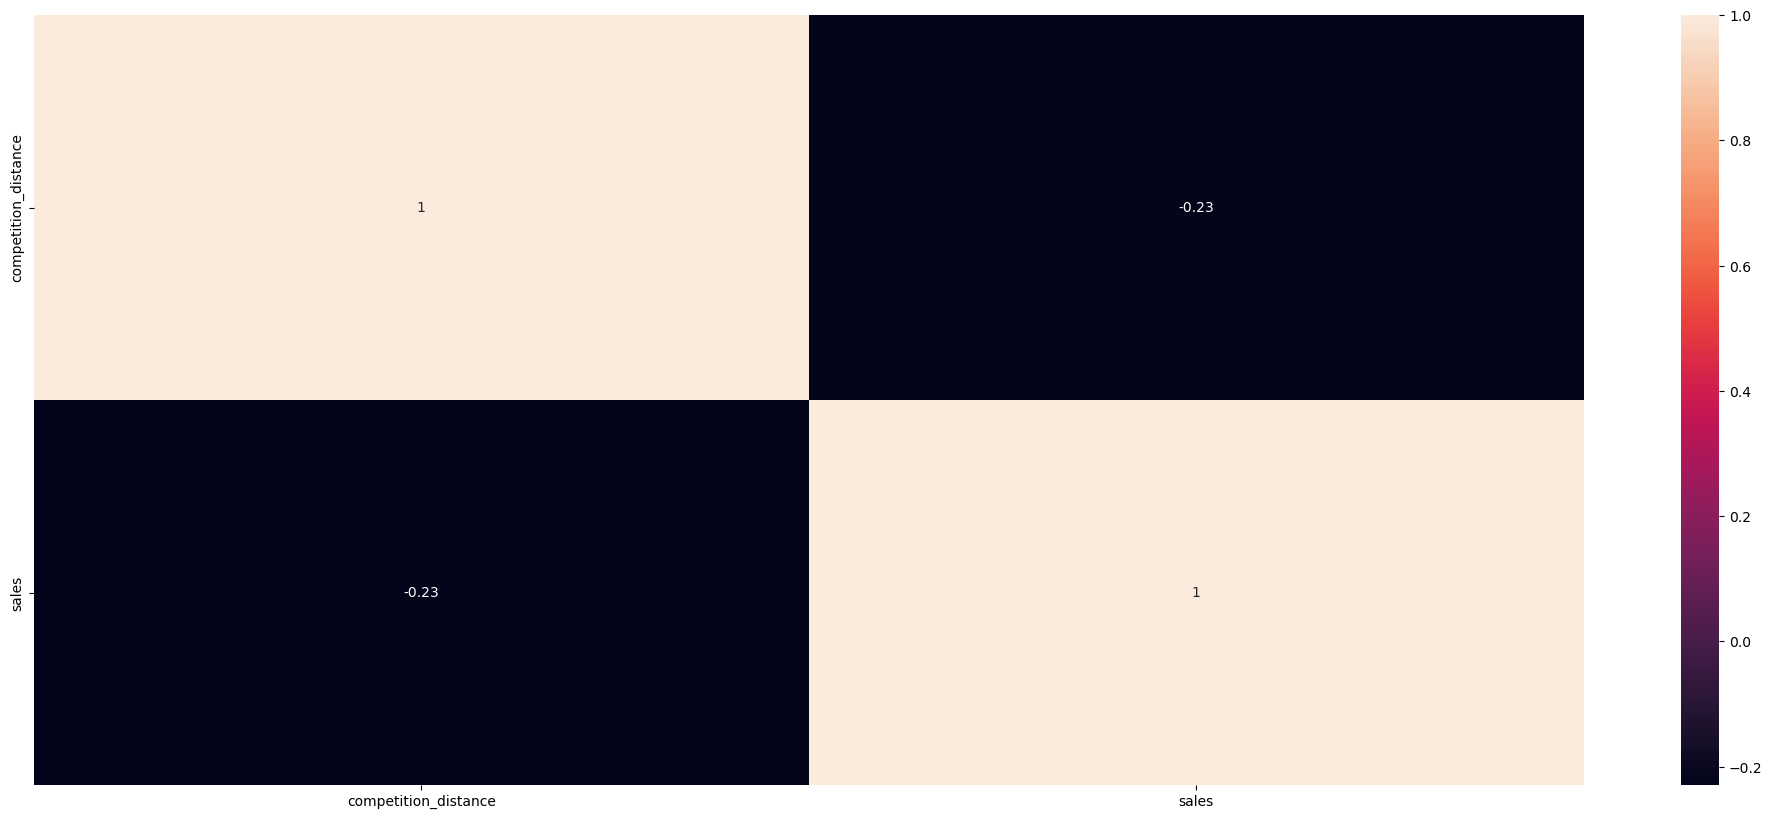

In [41]:
# Gráfico que mede a força da correlação entre a competition_distance e as vendas para termos uma feeling melhor sobre a força do imapcto dessa var
# na var resposta 
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()
sns.heatmap(aux1.corr(method='pearson'), annot = True)

# Aqui tem um bug em algumas versões, que não da pra ver direito pq os numeros não ficam no meio, ficam deslocados, então usa-se o código pra ajustar
# bottom, top = x.get_ylim()
# x.set_ylim( bottom+0.5, top-0.5 );


# CORRELAÇÃO
# A correlação vai de 1 ATÉ -1, 
#   *Quanto mais próxima de 0, mais fraca é a correlação, 
#   *Quanto mais próxima de 1 ou -1, mais forte é a correlação.
#
# A correlação de -0.23 é legalzinha, quanto mais distante o meu concorrente está menor a venda. 

C:\Users\andre\AppData\Local\Temp\ipykernel_2096\1683301240.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aux1.corr(method='pearson'), annot = True);


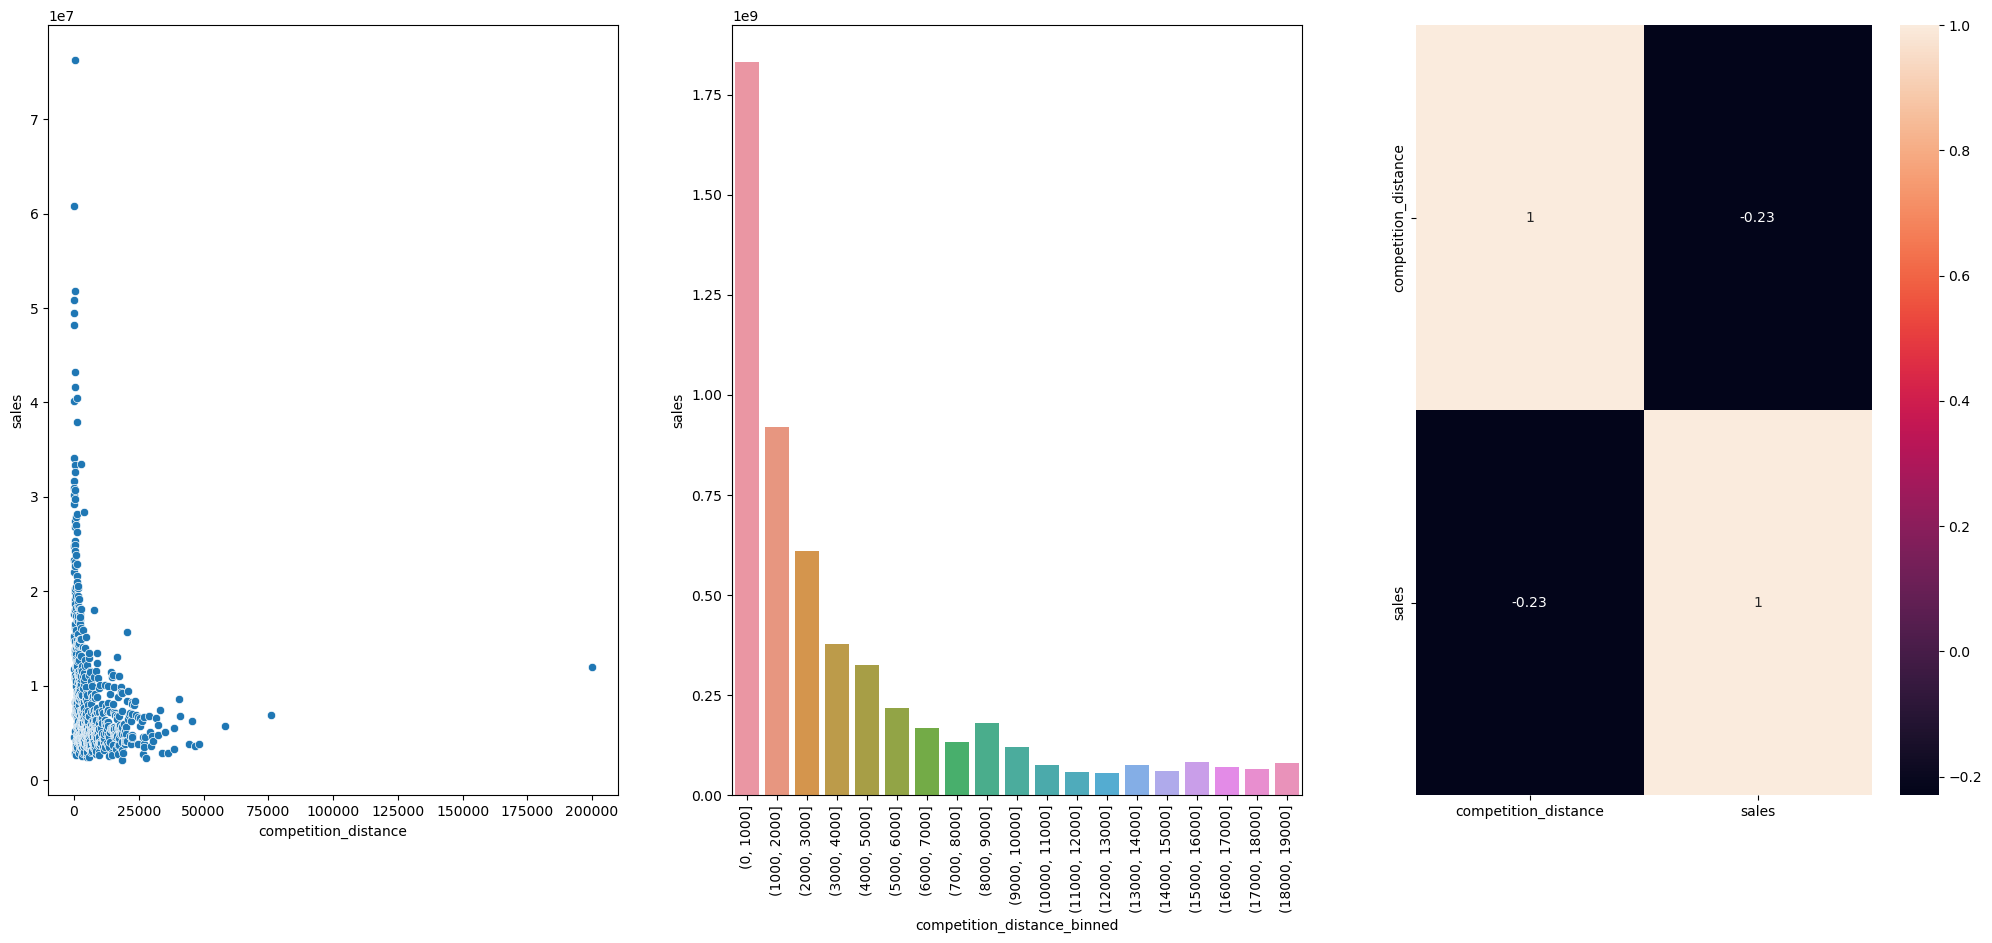

In [46]:
# Resumo
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1,3,1)
sns.scatterplot(x = 'competition_distance', y='sales', data=aux1);

plt.subplot(1,3,2)
bins = list(np.arange(0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins = bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned', y='sales', data=aux2);
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot = True);

### H3. Lojas com competidores à mais tempo deveriam vender mais.
**FALSA** - Lojas com competidores a MAIS TEMPO vendem MENOS!

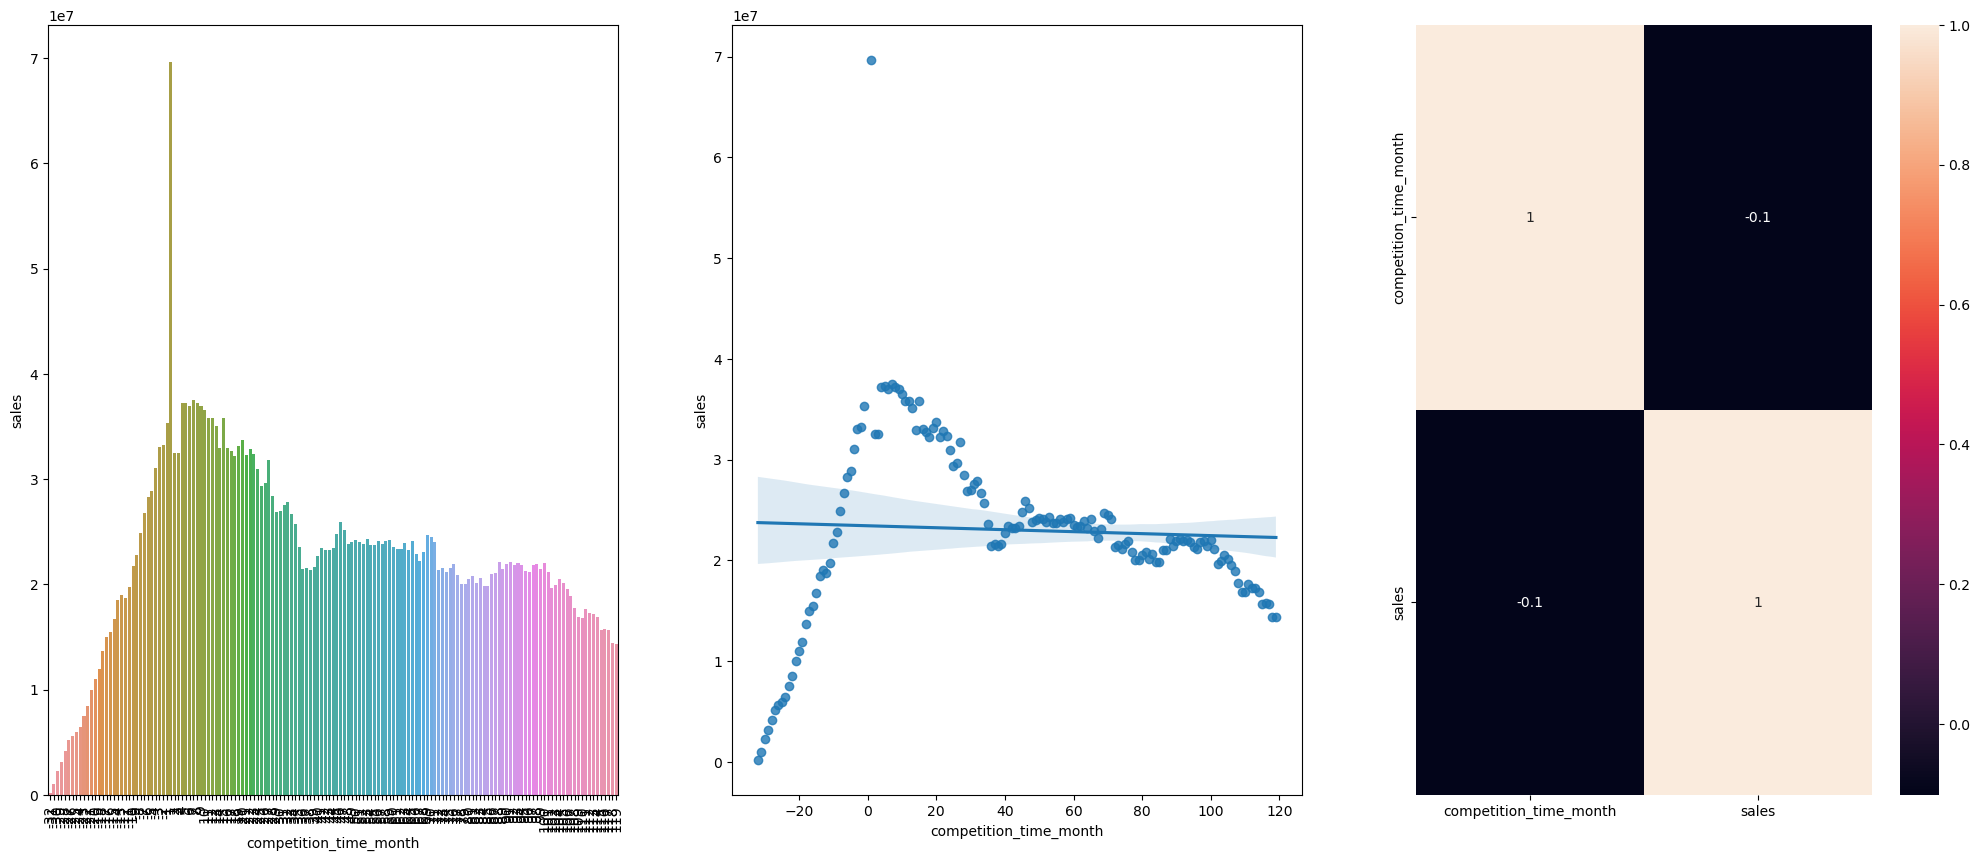

In [47]:
# Usando a var competition_open_since_month, gera um gráfico que não nos diz nada, porque estamos interessados em saber qual
# é a relação do tempo que o competidor está aberto com as vendas (esse tempo desde que começou, como influência nas vendas?), por isso 
# devemos usar a var derivada competition_time_month.

plt.subplot(1,3,1)
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()

# Para melhorar a visualização, como temos muitos meses, será um gráfico super granular, criaremos um filtro, pois antes só dava 
# pra ver um pico.
# Olharemos apenas os 120 primeiros meses de competição e diferente de 0.
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]

# Os valores negativos são das lojas que vão abrir ainda
sns.barplot(x='competition_time_month', y='sales', data=aux2); # ; para não ficar aparecendo mesangem dos gráficos.
plt.xticks(rotation=90);
# Quanto mais recente é a competição/abertura da loja dos competidores, maior são as nossas vendas, tmb é contraditório ao senso comum - outro
# insight aqui. Dessa forma já desvalidamos essa hipótese!


# Mesma coisa que o barplot, diferença é que plota uma linha de tendência 
# NÃO ligue muito para esse gráfico não, ele só quis mostrar outra forma de fazer, mas a verdade que isso não é um projeto linear, então não podemos
# nos basear nesse comportamento de crescimento ou decaimento (linha de tendência), entao se fizermos uma linha de tendência linear aqui como é o 
# caso, estará completamente enviesado ao erro.
plt.subplot(1,3,2)
sns.regplot(x='competition_time_month', y='sales', data=aux2);


# Correlação entre competition_time_month e sales.
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);
#Tempo em que o competidor começoeu em meses em relação a var resposta é -0,1, é legazinha, não é proxima de 0 como 0,0 alguma coisa... mas também
#está longe de 1 e -1.

# Então 2 coisas:
#   Em questão de validação de hipótese, está desvalidada é Falsa!
#   E em termos de relevancia para o modelo, será uma var relevante porque tem uma correlação não tão próxima de 0.

## 4.3 Análise Multivariada